In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import sys

sys.path.append('simulation')

In [3]:
from general import DataTransmission
from systematic_encoders import (Systematic_Poisson, 
                                 Systematic_Binomial,
                                 Systematic_All_At_D) 
from channels import BEC
from decoders import LT

In [4]:
from tqdm import tqdm

In [10]:
def test_encoder_method(n, k, params, 
                encoder_method, 
                channel, 
                decoder_method, 
                num_exps=1000,
                verbose=False):
    
    means = []
    
    if verbose:
        print("=== Simulation started! ===")
    
    for param in tqdm(params):
        
        recovered = []
        
        for _ in range(num_exps):
            
            encoder = encoder_method(n, k, param)
            decoder = decoder_method(k)
            
            dt = DataTransmission(n, k, encoder, channel, decoder, False)
            recovered.append(dt())
            
        means.append(np.mean(recovered))
        
    if verbose:
        print("=== Simulation ended! ===")
        
    return means

In [20]:
def make_experiment(n, k, p, n_dots, num_exps, testing_methods, ax, verbose=False):
    
    channel = BEC(p)

    for name in testing_methods:

        encoder, params, xticks = testing_methods[name]

        results = test_encoder_method(n, k, 
                                      params, 
                                      encoder, 
                                      channel, 
                                      LT,
                                      num_exps,
                                      verbose)

        ax.plot(xticks, results, label=name)
        print(f'n={n}, k={k}, tau={p}, method={name}, Increased from {int(p * 100)}% to {(1 - np.max(results) / k) * 100:.2f}%')

    ax.set_title(f'n={n}, k={k}, p={p}')
    ax.set_xlabel('Edges expectation')
    ax.set_ylabel('Recovered expectation')
    ax.legend()
    ax.grid(0.2)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:31<00:00,  1.57it/s]


n=11, k=10, p=0.05, method=Systematic Poisson, Increased from 5% to 2.07%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:30<00:00,  1.64it/s]


n=11, k=10, p=0.05, method=Systematic Binomial, Increased from 5% to 2.06%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.72it/s]


n=11, k=10, p=0.05, method=All At D, Increased from 5% to 2.03%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:59<00:00,  1.19s/it]


n=22, k=20, p=0.05, method=Systematic Poisson, Increased from 5% to 2.17%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:56<00:00,  1.13s/it]


n=22, k=20, p=0.05, method=Systematic Binomial, Increased from 5% to 2.09%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:21<00:00,  1.05s/it]


n=22, k=20, p=0.05, method=All At D, Increased from 5% to 2.05%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:26<00:00,  1.73s/it]


n=33, k=30, p=0.05, method=Systematic Poisson, Increased from 5% to 1.95%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:26<00:00,  1.73s/it]


n=33, k=30, p=0.05, method=Systematic Binomial, Increased from 5% to 1.93%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:48<00:00,  1.62s/it]


n=33, k=30, p=0.05, method=All At D, Increased from 5% to 1.90%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:06<00:00,  2.53s/it]


n=44, k=40, p=0.05, method=Systematic Poisson, Increased from 5% to 1.80%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:58<00:00,  2.37s/it]


n=44, k=40, p=0.05, method=Systematic Binomial, Increased from 5% to 1.77%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [01:28<00:00,  2.21s/it]


n=44, k=40, p=0.05, method=All At D, Increased from 5% to 1.75%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:36<00:00,  3.13s/it]


n=55, k=50, p=0.05, method=Systematic Poisson, Increased from 5% to 1.68%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:31<00:00,  3.03s/it]


n=55, k=50, p=0.05, method=Systematic Binomial, Increased from 5% to 1.61%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:25<00:00,  2.91s/it]


n=55, k=50, p=0.05, method=All At D, Increased from 5% to 1.58%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:14<00:00,  3.88s/it]


n=66, k=60, p=0.05, method=Systematic Poisson, Increased from 5% to 1.53%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:04<00:00,  3.69s/it]


n=66, k=60, p=0.05, method=Systematic Binomial, Increased from 5% to 1.54%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [03:33<00:00,  3.56s/it]


n=66, k=60, p=0.05, method=All At D, Increased from 5% to 1.48%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


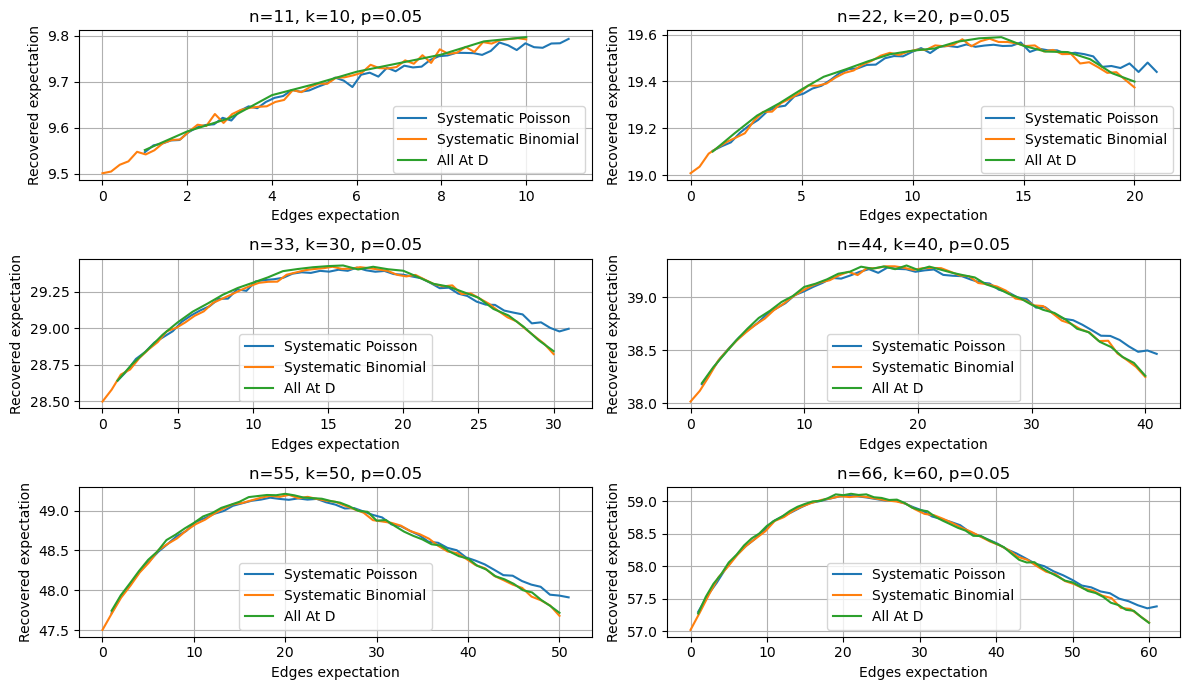

In [24]:
p = 0.05
n_dots, num_exps = 50, 10000

fig, ax = plt.subplots(3, 2, figsize=(12, 7))

k_values = [10, 20, 30, 40, 50, 60]
n_values = [k + k // 10 for k in k_values]

for i in range(3):
    for j in range(2):
        
        n, k = n_values[2 * i + j], k_values[2 * i + j]
        
        testing_methods = {'Systematic Poisson' : (Systematic_Poisson,  np.linspace(0., k, n_dots), np.linspace(1., k + 1, n_dots)),
                           'Systematic Binomial': (Systematic_Binomial, np.linspace(0., 1., n_dots), np.linspace(0., k, n_dots)),
                           'All At D'           : (Systematic_All_At_D, range(1, k + 1), range(1, k + 1))}
        
        make_experiment(n, k, p,
                        n_dots, num_exps,
                        testing_methods,
                        ax[i][j],
                        False)
        
plt.tight_layout()
plt.savefig('exp1.eps')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:45<00:00,  1.10it/s]


n=12, k=10, p=0.05, method=Systematic Poisson, Increased from 5% to 1.33%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:43<00:00,  1.15it/s]


n=12, k=10, p=0.05, method=Systematic Binomial, Increased from 5% to 1.23%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.21it/s]


n=12, k=10, p=0.05, method=All At D, Increased from 5% to 1.25%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:24<00:00,  1.70s/it]


n=24, k=20, p=0.05, method=Systematic Poisson, Increased from 5% to 0.87%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:21<00:00,  1.62s/it]


n=24, k=20, p=0.05, method=Systematic Binomial, Increased from 5% to 0.85%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.51s/it]


n=24, k=20, p=0.05, method=All At D, Increased from 5% to 0.83%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:23<00:00,  2.87s/it]


n=36, k=30, p=0.05, method=Systematic Poisson, Increased from 5% to 0.64%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:19<00:00,  2.79s/it]


n=36, k=30, p=0.05, method=Systematic Binomial, Increased from 5% to 0.61%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:19<00:00,  2.65s/it]


n=36, k=30, p=0.05, method=All At D, Increased from 5% to 0.58%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:22<00:00,  4.06s/it]


n=48, k=40, p=0.05, method=Systematic Poisson, Increased from 5% to 0.44%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:54<00:00,  3.48s/it]


n=48, k=40, p=0.05, method=Systematic Binomial, Increased from 5% to 0.44%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [02:12<00:00,  3.31s/it]


n=48, k=40, p=0.05, method=All At D, Increased from 5% to 0.41%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:27<00:00,  5.34s/it]


n=60, k=50, p=0.05, method=Systematic Poisson, Increased from 5% to 0.32%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:15<00:00,  5.12s/it]


n=60, k=50, p=0.05, method=Systematic Binomial, Increased from 5% to 0.31%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:58<00:00,  4.78s/it]


n=60, k=50, p=0.05, method=All At D, Increased from 5% to 0.30%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:45<00:00,  6.90s/it]


n=72, k=60, p=0.05, method=Systematic Poisson, Increased from 5% to 0.25%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:32<00:00,  6.64s/it]


n=72, k=60, p=0.05, method=Systematic Binomial, Increased from 5% to 0.26%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [06:21<00:00,  6.36s/it]


n=72, k=60, p=0.05, method=All At D, Increased from 5% to 0.24%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


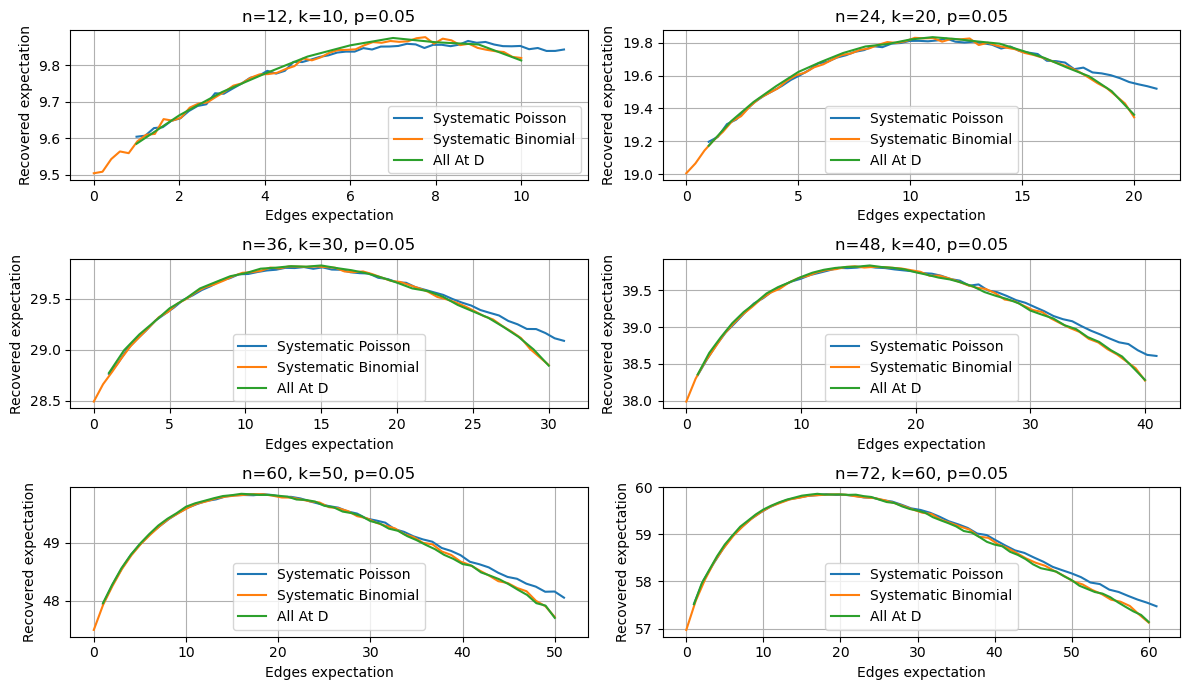

In [25]:
p = 0.05
n_dots, num_exps = 50, 10000

fig, ax = plt.subplots(3, 2, figsize=(12, 7))

k_values = [10, 20, 30, 40, 50, 60]
n_values = [k + k // 5 for k in k_values]

for i in range(3):
    for j in range(2):
        
        n, k = n_values[2 * i + j], k_values[2 * i + j]
        
        testing_methods = {'Systematic Poisson' : (Systematic_Poisson,  np.linspace(0., k, n_dots), np.linspace(1., k + 1, n_dots)),
                           'Systematic Binomial': (Systematic_Binomial, np.linspace(0., 1., n_dots), np.linspace(0., k, n_dots)),
                           'All At D'           : (Systematic_All_At_D, range(1, k + 1), range(1, k + 1))}
        
        make_experiment(n, k, p,
                        n_dots, num_exps,
                        testing_methods,
                        ax[i][j],
                        False)
        
plt.tight_layout()
plt.savefig('exp2.eps')

===

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:31<00:00,  1.58it/s]


n=11, k=10, p=0.07, method=Systematic Poisson, Increased from 7% to 3.68%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:32<00:00,  1.53it/s]


n=11, k=10, p=0.07, method=Systematic Binomial, Increased from 7% to 3.62%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.56it/s]


n=11, k=10, p=0.07, method=All At D, Increased from 7% to 3.57%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:02<00:00,  1.25s/it]


n=22, k=20, p=0.07, method=Systematic Poisson, Increased from 7% to 3.72%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:00<00:00,  1.20s/it]


n=22, k=20, p=0.07, method=Systematic Binomial, Increased from 7% to 3.73%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:22<00:00,  1.11s/it]


n=22, k=20, p=0.07, method=All At D, Increased from 7% to 3.65%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:32<00:00,  1.84s/it]


n=33, k=30, p=0.07, method=Systematic Poisson, Increased from 7% to 3.57%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:25<00:00,  1.71s/it]


n=33, k=30, p=0.07, method=Systematic Binomial, Increased from 7% to 3.53%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:49<00:00,  1.64s/it]


n=33, k=30, p=0.07, method=All At D, Increased from 7% to 3.42%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:00<00:00,  2.40s/it]


n=44, k=40, p=0.07, method=Systematic Poisson, Increased from 7% to 3.40%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:56<00:00,  2.32s/it]


n=44, k=40, p=0.07, method=Systematic Binomial, Increased from 7% to 3.39%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [01:28<00:00,  2.22s/it]


n=44, k=40, p=0.07, method=All At D, Increased from 7% to 3.34%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:40<00:00,  3.21s/it]


n=55, k=50, p=0.07, method=Systematic Poisson, Increased from 7% to 3.32%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:33<00:00,  3.06s/it]


n=55, k=50, p=0.07, method=Systematic Binomial, Increased from 7% to 3.21%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:28<00:00,  2.96s/it]


n=55, k=50, p=0.07, method=All At D, Increased from 7% to 3.25%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:29<00:00,  4.18s/it]


n=66, k=60, p=0.07, method=Systematic Poisson, Increased from 7% to 3.18%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:01<00:00,  3.63s/it]


n=66, k=60, p=0.07, method=Systematic Binomial, Increased from 7% to 3.14%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [03:42<00:00,  3.72s/it]


n=66, k=60, p=0.07, method=All At D, Increased from 7% to 3.07%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


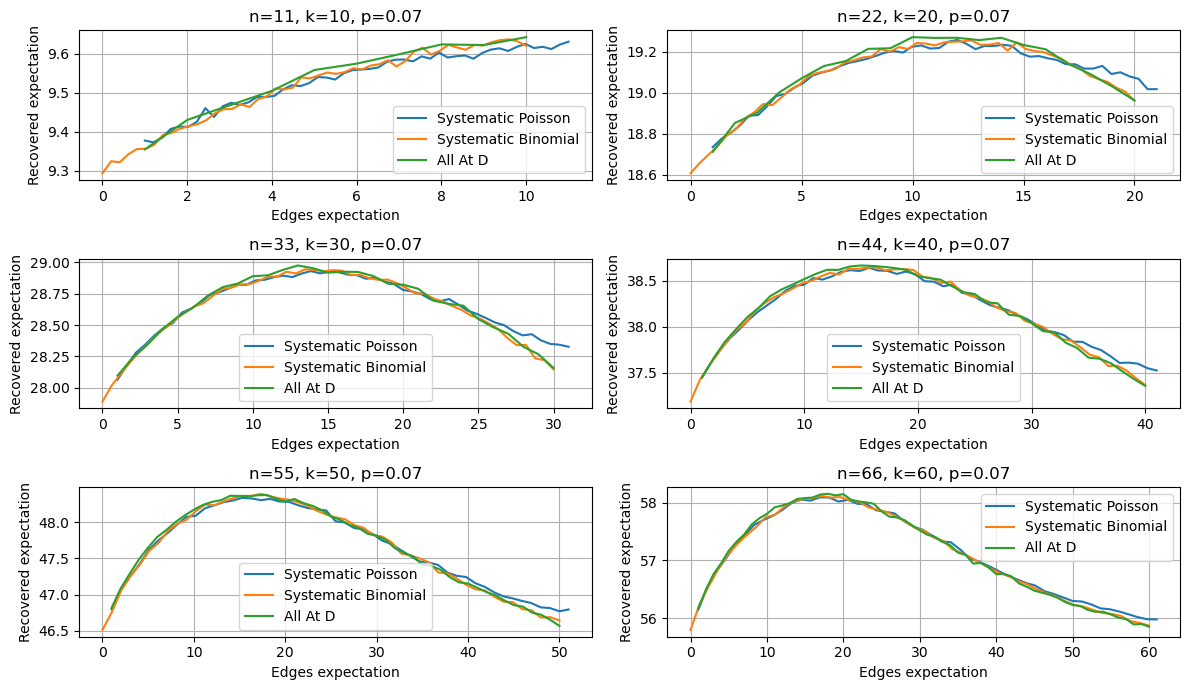

In [26]:
p = 0.07
n_dots, num_exps = 50, 10000

fig, ax = plt.subplots(3, 2, figsize=(12, 7))

k_values = [10, 20, 30, 40, 50, 60]
n_values = [k + k // 10 for k in k_values]

for i in range(3):
    for j in range(2):
        
        n, k = n_values[2 * i + j], k_values[2 * i + j]
        
        testing_methods = {'Systematic Poisson' : (Systematic_Poisson,  np.linspace(0., k, n_dots), np.linspace(1., k + 1, n_dots)),
                           'Systematic Binomial': (Systematic_Binomial, np.linspace(0., 1., n_dots), np.linspace(0., k, n_dots)),
                           'All At D'           : (Systematic_All_At_D, range(1, k + 1), range(1, k + 1))}
        
        make_experiment(n, k, p,
                        n_dots, num_exps,
                        testing_methods,
                        ax[i][j],
                        False)
        
plt.tight_layout()
plt.savefig('exp3.eps')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:45<00:00,  1.10it/s]


n=12, k=10, p=0.07, method=Systematic Poisson, Increased from 7% to 2.40%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:43<00:00,  1.16it/s]


n=12, k=10, p=0.07, method=Systematic Binomial, Increased from 7% to 2.31%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.23it/s]


n=12, k=10, p=0.07, method=All At D, Increased from 7% to 2.21%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:23<00:00,  1.66s/it]


n=24, k=20, p=0.07, method=Systematic Poisson, Increased from 7% to 1.86%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:19<00:00,  1.60s/it]


n=24, k=20, p=0.07, method=Systematic Binomial, Increased from 7% to 1.78%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:30<00:00,  1.51s/it]


n=24, k=20, p=0.07, method=All At D, Increased from 7% to 1.73%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:14<00:00,  2.69s/it]


n=36, k=30, p=0.07, method=Systematic Poisson, Increased from 7% to 1.45%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:04<00:00,  2.49s/it]


n=36, k=30, p=0.07, method=Systematic Binomial, Increased from 7% to 1.32%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [01:08<00:00,  2.29s/it]


n=36, k=30, p=0.07, method=All At D, Increased from 7% to 1.36%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:00<00:00,  3.62s/it]


n=48, k=40, p=0.07, method=Systematic Poisson, Increased from 7% to 1.18%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:03<00:00,  3.68s/it]


n=48, k=40, p=0.07, method=Systematic Binomial, Increased from 7% to 1.10%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [02:17<00:00,  3.44s/it]


n=48, k=40, p=0.07, method=All At D, Increased from 7% to 1.00%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:25<00:00,  5.30s/it]


n=60, k=50, p=0.07, method=Systematic Poisson, Increased from 7% to 0.94%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:09<00:00,  4.98s/it]


n=60, k=50, p=0.07, method=Systematic Binomial, Increased from 7% to 0.94%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [04:01<00:00,  4.83s/it]


n=60, k=50, p=0.07, method=All At D, Increased from 7% to 0.87%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:38<00:00,  6.76s/it]


n=72, k=60, p=0.07, method=Systematic Poisson, Increased from 7% to 0.76%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:25<00:00,  6.50s/it]


n=72, k=60, p=0.07, method=Systematic Binomial, Increased from 7% to 0.74%


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 60/60 [06:04<00:00,  6.07s/it]


n=72, k=60, p=0.07, method=All At D, Increased from 7% to 0.69%


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


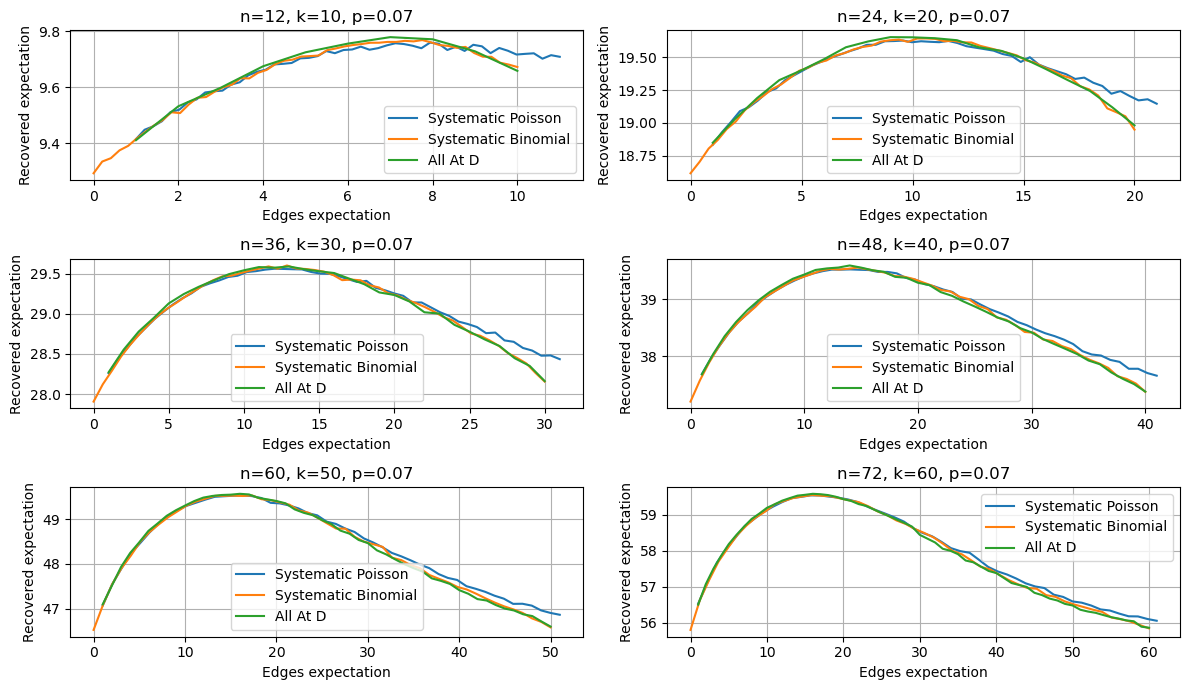

In [27]:
p = 0.07
n_dots, num_exps = 50, 10000

fig, ax = plt.subplots(3, 2, figsize=(12, 7))

k_values = [10, 20, 30, 40, 50, 60]
n_values = [k + k // 5 for k in k_values]

for i in range(3):
    for j in range(2):
        
        n, k = n_values[2 * i + j], k_values[2 * i + j]
        
        testing_methods = {'Systematic Poisson' : (Systematic_Poisson,  np.linspace(0., k, n_dots), np.linspace(1., k + 1, n_dots)),
                           'Systematic Binomial': (Systematic_Binomial, np.linspace(0., 1., n_dots), np.linspace(0., k, n_dots)),
                           'All At D'           : (Systematic_All_At_D, range(1, k + 1), range(1, k + 1))}
        
        make_experiment(n, k, p,
                        n_dots, num_exps,
                        testing_methods,
                        ax[i][j],
                        False)
        
plt.tight_layout()
plt.savefig('exp4.eps')